In [54]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [55]:
# Define the Encoding  Dimension
encoding_dim = 64

In [56]:
# Input layer: MNIST image (28x28) reconverted to a vector of 784x1 to fit the layer
input_img = Input(shape=(784,))

# The encoded layer is a fully connected layer with ReLU activation function and applied on input layer of the previous layer.  
encoded = Dense(encoding_dim, activation='relu')(input_img)
#The decoded layer is also fully connected and its output is the same size (784)
decoded = Dense(784, activation='sigmoid')(encoded)

# The Model for the Autoencoder. Input is the input layer and output is the decoded layer
autoencoder = Model(input_img, decoded)

# The Model for the Encoder with original Input and Output is the encoder itself
encoder = Model(input_img, encoded)

# The Model for the Decoder
# Create placeholder for Encoded Input 
encoded_input = Input(shape=(encoding_dim,))
# Extract the last layer from the Autoencoder (32-dimensional) input
decoder_layer = autoencoder.layers[-1]
# Build the Model for the Decoder
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [57]:
# Compile the Model to run the Autoencoder and specify the type of loss function and optimizer needed to compile in Keras
autoencoder.compile(optimizer='adadelta', loss = 'binary_crossentropy')

# Load MNIST dataset

In [59]:
(x_train, _),(x_test, _) = mnist.load_data()

# Normalize the values between 0 and 1, float32 is a floating-point number that occupies 32 bits of storage.
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
x_train = x_train.reshape((len(x_train), (np.prod(x_train.shape[1:]))))
x_test = x_test.reshape((len(x_test), (np.prod(x_test.shape[1:]))))

print(f'x_train shape = {x_train.shape}')
print(f'x_test shape = {x_test.shape}')

x_train shape = (60000, 784)
x_test shape = (10000, 784)


# Fit Data

In [ ]:
# Train the autoencoder for 50 epochs (an epoch refers to one cycle through the full training dataset) 
# Batch size generally approximates the distribution of the input data better than a single input
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

In [61]:
# Encode and Decode some digits from the test set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

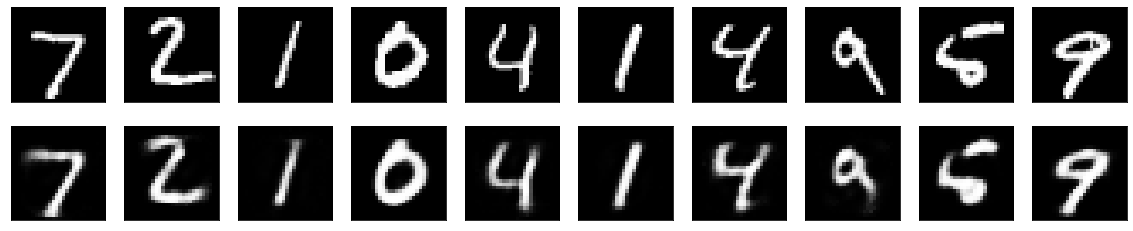

In [62]:
# Use 10 Digits 
n = 10 
plt.figure(figsize=(20,4))

for i in range(n):
    # Display Original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display Reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()